In [8]:
import numpy as np
import matplotlib.pyplot as plt

import math


In [34]:
sensor = (1.83, -0.83, 0.50)

obstacles = [
    # [(-4.29, -3.43), (-3.42, 1.47), (1.97, 1.99)],
    # [(-2.32, -2.06), (-3.33, 1.50), (0.12, 1.98)],
    # [(-4.41, -2.55), (3.82, 7.54), (0.11, 0.71)],
    # [(-0.92, 0.87), (3.36, 6.18), (0.11, 1.06)],
    [(3.36, -0.87, 0.50), (6.18, 0.85, 0.50)],
]


Distance to obstacle: 1.61


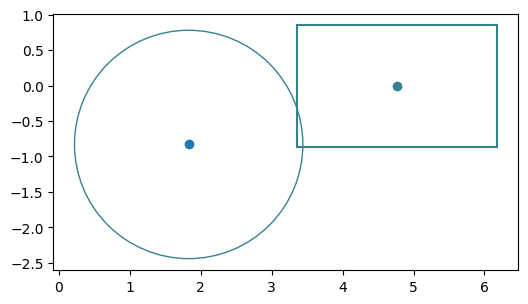

In [39]:
plt.figure(figsize=(6, 6))
plt.plot(sensor[0], sensor[1], 'o')

def distance_to_cube(x, y, z, x_min, x_max, y_min, y_max, z_min, z_max):
    # Check if the point is inside the cube
    if x_min <= x <= x_max and y_min <= y <= y_max and z_min <= z <= z_max:
        return 0.0  # The point is inside the cube, so the distance is 0

    # Calculate the distance to the cube's surfaces along each axis
    dx = max(0, x_min - x, x - x_max)
    dy = max(0, y_min - y, y - y_max)
    dz = max(0, z_min - z, z - z_max)

    # Calculate the Euclidean distance between the point and the cube's surfaces
    distance = math.sqrt(dx**2 + dy**2 + dz**2)
    return distance

# for (x_min, x_max), (y_min, y_max), (z_min, z_max) in obstacles:
for (x_min, y_min, z_min), (x_max, y_max, z_ax) in obstacles:
    # Pick random color
    color = np.random.rand(3,)

    plt.plot([x_min, x_max], [y_min, y_min], color=color)
    plt.plot([x_min, x_max], [y_max, y_max], color=color)
    plt.plot([x_min, x_min], [y_min, y_max], color=color)
    plt.plot([x_max, x_max], [y_min, y_max], color=color)

    plt.plot(x_min + (x_max - x_min) / 2, y_min + (y_max - y_min) / 2, 'o', color=color)

    distance = distance_to_cube(sensor[0], sensor[1], sensor[2], x_min, x_max, y_min, y_max, 0, 0)

    print(f'Distance to obstacle: {distance:.2f}')

    circle = plt.Circle((sensor[0], sensor[1]), distance, color=color, fill=False)

    plt.gca().add_patch(circle)

plt.gca().set_aspect('equal')
plt.show()
